# Coin detector using OpenCV 



### Import libraries

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import itertools


%matplotlib inline

In [2]:
from PIL import Image

### Input current directory location

In [3]:
# Creat a 2 folder test_input and output_test
input_image = 'test_input/test50.jpeg'
outpt_image='output_test/test500.jpg'

### Preprocess input image using OpenCV

(2048, 1536, 3)

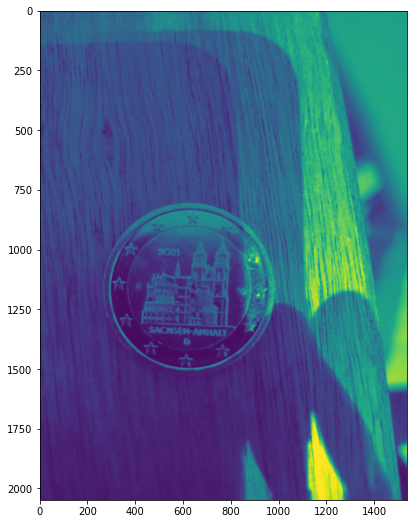

In [4]:
img = cv2.imread(input_image, cv2.IMREAD_COLOR)
img_orig = img.copy()


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.GaussianBlur(src,(5,5),cv2.BORDER_DEFAULT)
gray_blur = cv2.GaussianBlur(gray,(21,21), cv2.BORDER_DEFAULT)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(gray)
img_orig.shape

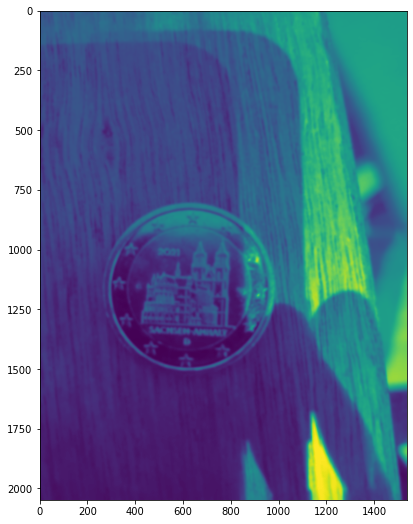

In [5]:
plt.imshow(gray_blur)

### Apply Hough Transformation

In [6]:
# Apply hough circles transformation
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 0.9, 120, param1=50, param2=30, minRadius=250, maxRadius=700)
circles_rounded = np.uint16(np.around(circles))
img = circles_rounded.reshape((circles_rounded.shape[1],circles_rounded.shape[2]))

# Sort 2D numpy array by 2nd Column
columnIndex = 0
img_sort = img[img[:,columnIndex].argsort()]

In [7]:
# Create seperate columns for X, Y locations with radius of circle
x = np.array(img_sort)[:,0]
y = np.array(img_sort)[:,1]
r = np.array(img_sort)[:,2]

In [8]:
# Pre-process x , y , r values for mean value calculation
add_x = np.add(x,r)
add_y = np.add(y,r)
sub_x = np.subtract(x,r)
sub_y = np.subtract(y,r)

In [9]:
# Calculate the mean values between the coins 

# Intialise lists and variables
a = [add_x]
check_x = []
check_add = []
check_sub = []
x_points = []        
l = [i for i in range(len(a[0]))]

# Loop to calculate the mean between the next coin
for i, j in itertools.product(add_x, l):
    x = ((int(a[0][j])-int(i)))
    y = add_x[j]
    z = sub_x[j]
    check_x.append(x)
    check_add.append(y)
    check_sub.append(z)

# Conversion of negatives if any
positive = [-x if x<0 else x for x in check_x]

# Loop to avoid values within the avoidable range (default value = 50)
for num, value in enumerate(positive):
    if value==0:
        zero_in = num
        zero_plus = zero_in + 1
        if zero_plus<=len(positive)-1:
            if positive[zero_plus]>50:
                ad = check_add[zero_plus]
                sub = check_sub[zero_in]
                mean = (ad+sub)/2
                x_points.append(mean)
print(x_points)

[]


### Draw & Label the Coins

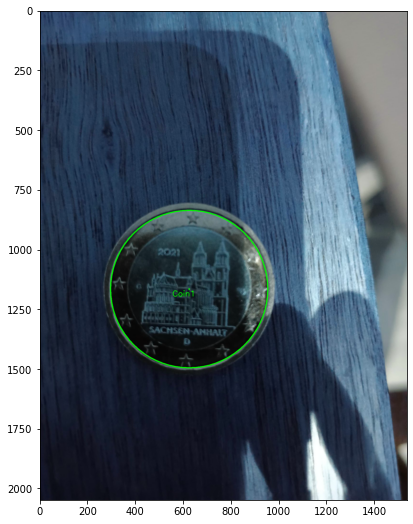

In [10]:
count = 1 
for i in circles_rounded[0, :]:
    cv2.circle(img_orig,(i[0],i[1]),i[2],(0,255,0),3)
    cv2.circle(img_orig,(i[0],i[1]),2,(0,255,0),2)
    cv2.putText(img_orig, "Coin" + str(count), (i[0]-70,i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,255,0), 2)
    count +=1
plt.imshow(img_orig)

### Draw the Lines for calculated mean values

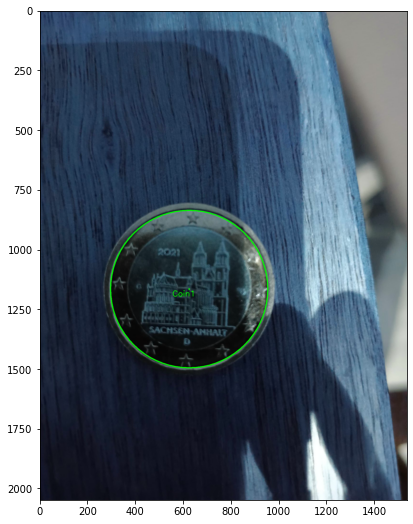

In [11]:
image = img_orig
for i in x_points:
    start_point = (int(i),max(add_y))
    end_point = (int(i), min(sub_y))  
    img = cv2.line(image, start_point, end_point, (0, 0, 255) , 2)
    
# Save the Output image into desired folder
cv2.imwrite(outpt_image, img)  
plt.imshow(img_orig)

### Output !!!

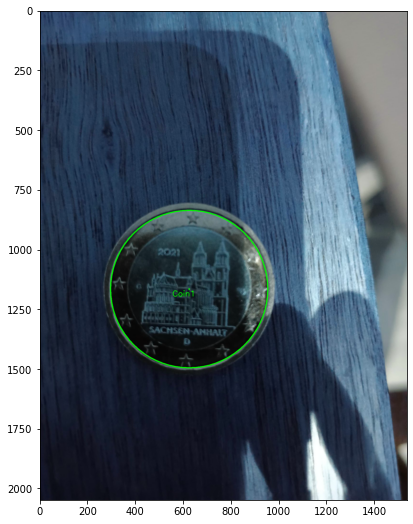

In [12]:
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img_orig)

In [13]:
gray.shape

(2048, 1536)

In [14]:
bw=np.zeros((2048, 1536))

In [15]:
for i in circles_rounded[0, :]:
    cv2.circle(bw,(i[0],i[1]),i[2],1,-1)
    cv2.circle(bw,(i[0],i[1]),2,1,-1)


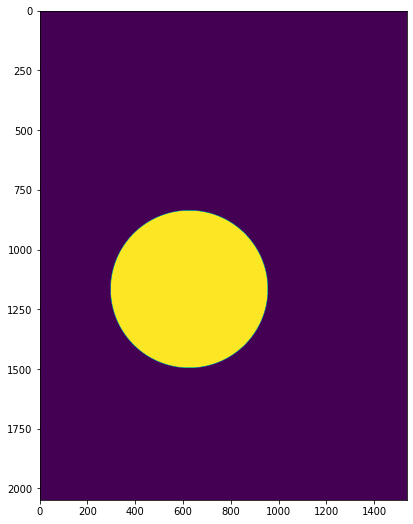

In [16]:
plt.imshow(bw)

In [17]:
gray_trait=gray*bw

In [18]:
gray_trait

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

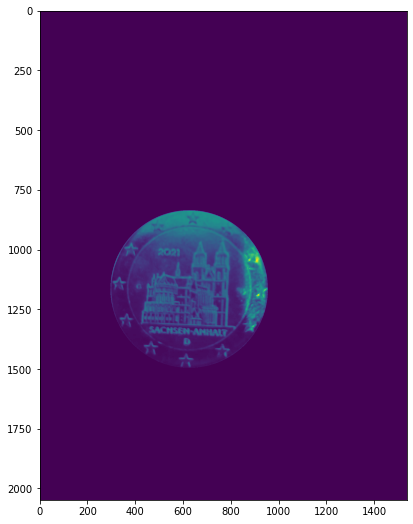

In [19]:
plt.imshow(gray_trait)

In [20]:
im = Image.fromarray(gray_trait)
new_p = im.convert('RGB')
im1 = new_p.save("geeks.jpeg")

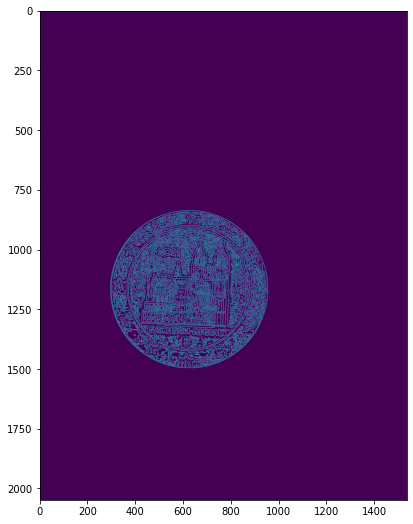

In [21]:
from skimage import feature
edges1 = feature.canny(gray_trait,sigma=1)
plt.imshow(edges1)